<a href="https://colab.research.google.com/github/Orixtosius/Bayesian/blob/main/SlotMachineBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [38]:
class SlotMachine():
  def __init__(self, machineId, fee, payouts, rate):

    self.machineId = machineId
    self.credit = 100000
    self.status = 'waiting'
    self.history = dict()
    self.fee = fee
    self.payouts = payouts
    self.rate = rate

  def playedMachine(self, User):

    if self.status != 'ready':
      print('Machine cannot be played')
      return
    p = np.random.random(1)[0]
    amount = self.transferMoney(p < self.rate, User.name)
    if(amount) > 0:
      print('Congratulations ! You have won 10000 dollars')
    else:
      print('You could not won. Do not lose your hope, try again !')
    User.transferToPlayer(amount, self)
  
  def transferMoney(self, result, user):

    amount = 0
    if result:
      amount = -10000

    if self.history.__contains__(user):
      self.history[user].append(amount)
    else:
      self.history.update({f'{user}': [amount]})
      
    self.credit =+ amount
    if self.credit < 0 or self.credit + amount == 0:
      self.shutDown()
      if self.credit < 0:
        print(f'This machine does not have enough money to pay you please contact with our supervisor Amount to be payed {np.abs(self.credit)}')       
      else:    
        print('Credit of machine has deprieved. Please come back later to play.\n')
    return amount

  def shutDown(self):
    print('Machine has closed')
    self.status = 'shutdown'
  
  def startUp(self):
    print('Machine is ready for action')
    self.credit = 100000
    self.status = 'waiting'
  
  def feeReceived(self, money):
    self.credit += money
    print('Machine is active. Please pull lever to play')
    self.status = 'ready'

In [39]:
class playRecords():
  def __init__(self, playerID, machineID):
    self.mu = 0
    self.N = 0
    self.player = playerID
    self.machine = machineID
    print(f'New Record has created between {self.player} plays {self.machine}')
  
  def Play(self, change):
    print(f'Values are updating...\nPlease wait.')
    self.N += 1
    self.mu = self.mu + (change - self.mu)/self.N

  def showInfo(self):
    print('------------   REPORT    -------------')
    print(f'Expected Revenue : {self.mu}')
    print(f'Played time : {self.N}\n')

In [65]:
class Player():
  def __init__(self, name, money, epsilon):
    self.name = name
    self.money = money
    self.tempMoney = 0
    self.pastPlays = []
    self.machineList = []
    self.reportList = []
    self.epsilon = epsilon
    self.tapOut = 0
  
  def detectMachinesToBePlayed(self, Machine):
    self.machineList.append(Machine)
    self.reportList.append(playRecords(self.name, Machine.machineId))

  def checkOptions(self):
    options = [m for m in self.machineList if m.status == 'waiting' and m.fee < self.money]
    return options
  
  def choiceOfSlotMachine(self):
    if self.tapOut:
      return
    options = self.checkOptions()
    if not len(options):
      print('You cant play any machine. Come back later.\n')
      return
    else:
      machinesInfo = [[mac.mu, mac.N] for mac in self.reportList]

      if max(machinesInfo)[0] == 0:
        chosenMachine = np.random.randint(len(self.machineList)-1)
      else:
        bestChoice = machinesInfo.index(max(machinesInfo))
        p = np.random.random(1)[0]
        if p > self.epsilon:
          chosenMachine = bestChoice
        else:
          choice = np.random.randint(len(machinesInfo)-1)
          while choice == bestChoice:
            choice = np.random.randint(len(machinesInfo)-1)
          chosenMachine = choice

    print(f'Machine - {chosenMachine} has been chosen to be played.')

    self.playSlotMachine(self.machineList[chosenMachine])
      
    
  def playSlotMachine(self, machine):

    if self.money < machine.fee:
      print('You dont have enough money to play this machine')
      return
    else:
      machine.feeReceived(machine.fee)
      print('Fee has been payed')
      if not (self.reportList.__contains__(machine.machineId)):
        print('You have played this machine for the first time')
        self.reportList[machine.machineId] = playRecords(self.name, machine.machineId)
      machine.playedMachine(self)
  
  def transferToPlayer(self, money, Machine):

    self.money = self.money + money + self.tempMoney
    if self.money <= 0:
      self.tapOut = 1
    desiredReport = [report for report in self.reportList if report.machine == Machine.machineId]
    desiredReport[0].Play(money + self.tempMoney)
    if desiredReport[0].N == 10:
      desiredReport[0].showInfo()

In [69]:
slot1 = SlotMachine(1, 100, 10000000, 0.3)
slot2 = SlotMachine(2, 100, 10000000, 0.35)

In [70]:
player = Player('Levent', 1000000, 0.1)
player2 = Player('Osman', 1000000, 0.2)
player.detectMachinesToBePlayed(slot1)
player.detectMachinesToBePlayed(slot2)
player2.detectMachinesToBePlayed(slot1)
player2.detectMachinesToBePlayed(slot2)

New Record has created between Levent plays 1
New Record has created between Levent plays 2
New Record has created between Osman plays 1
New Record has created between Osman plays 2


Machine - 0 has been chosen to be played.
Machine is active. Please pull lever to play
Fee has been payed
You have played this machine for the first time
New Record has created between Levent plays 1
Machine has closed
Credit of machine has deprieved. Please come back later to play.

You could not won. Do not lose your hope, try again !
Values are updating...
Please wait.
Machine - 0 has been chosen to be played.
Machine is active. Please pull lever to play
Fee has been payed
You have played this machine for the first time
New Record has created between Osman plays 1
Machine has closed
Credit of machine has deprieved. Please come back later to play.

You could not won. Do not lose your hope, try again !
Values are updating...
Please wait.
Machine - 0 has been chosen to be played.
Machine is active. Please pull lever to play
Fee has been payed
You have played this machine for the first time
New Record has created between Levent plays 1
Machine has closed
This machine does not have enoug

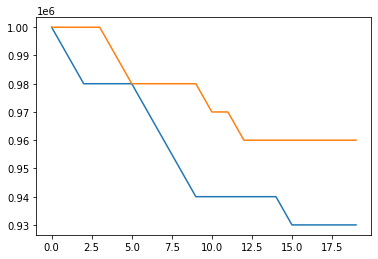

In [71]:
x = []
y = []
for i in range(20):
  player.choiceOfSlotMachine()
  x.append(player.money)
  player2.choiceOfSlotMachine()
  y.append(player2.money)
plt.plot(x, label=f'Journey of money of {player.name}')
plt.plot(y, label=f'Journey of money of {player2.name}')

In [14]:
player.reportList[1].N

0